## **OpenCV**: Contour Detection


En este laboratorio, nuestro objetivo será aplicar técnicas de edición de imágenes: deteccion de contornos

# **Detección de contornos**

Es una de las técnicas más usadas en visión computacional, principalmente porque permite hacer cosas como:


1.   Detección de Movimiento
2.   Detección de Objetos
3.   Segmentación de fondo de la imagen, etc.







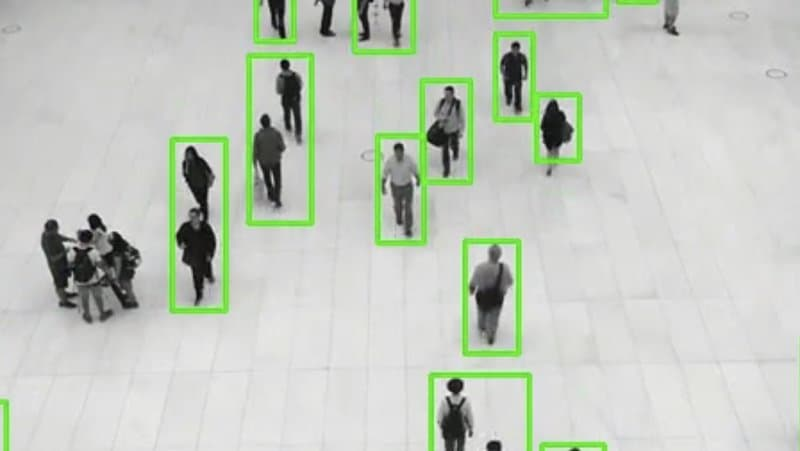

# ¿Qué son los contornos?

Cuando unimos todos los puntos del límite de un objeto, obtenemos un contorno. Normalmente, un contorno específico se refiere a los píxeles del límite que tienen el mismo color e intensidad.

En OpenCV existen 2 funciones referentes a los contornos de una imagen:


*   **findContours()**
*   **drawContours()**

Además, viene con 2 algoritmos de detección:


1.   *CHAIN_APPROX_SIMPLE*
2.   *CHAIN_APPROX_NONE*

Lo explicaremos más adelante.




1.   Carga la imagen y haz una conversión a escala de grises

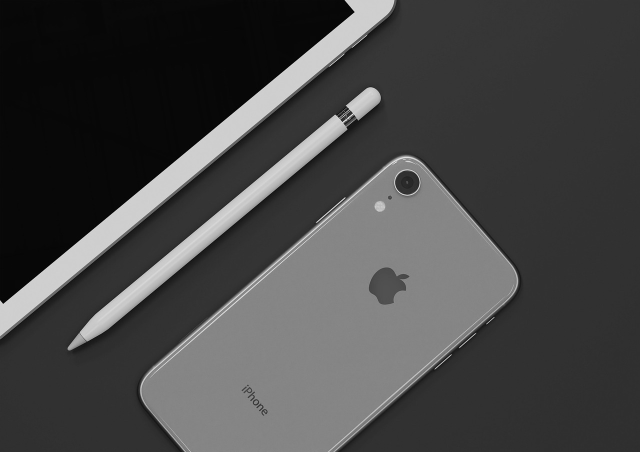

In [80]:
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('image_1.jpg')
image = cv2.resize(image, (640, 452)) # rebajamos la imagen en un 50% para que no use tanto espacio
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2_imshow(img_gray)

2. Aplicar Binary Thresholding a la imagen en escala de grises

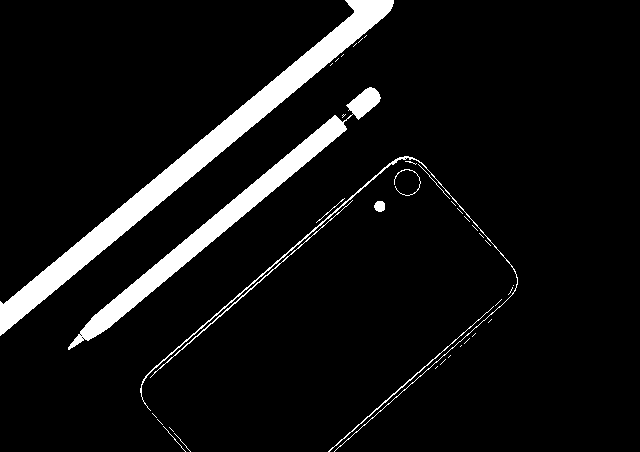

In [ ]:
# Binary Thresholding
ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)

cv2_imshow(thresh)

3. Encontrar los contornos en la imagen creada usando la función *findContours()*

In [ ]:
# la funcion findContours requiere 3 inputs mínimo (image= tu imagen, mode= el modo de extraccion de contornos,
# method= metodo de aproximacion de contornos)

# nosotros usaremos el RETR_TREE, que significa que el algoritmo recuperará todos los contornos posibles de la imagen.
# además, usaremos el CHAIN_APPROX_NONE que podrá almacenar todos los puntos del contorno detectado
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

*Para más modos del findContour(), vease [aquí](https://docs.opencv.org/master/d3/dc0/group__imgproc__shape.html#ga819779b9857cc2f8601e6526a3a5bc71)*

4. Dibujar los contornos guardados en una copia de la imagen original, usando la función *drawContours()*

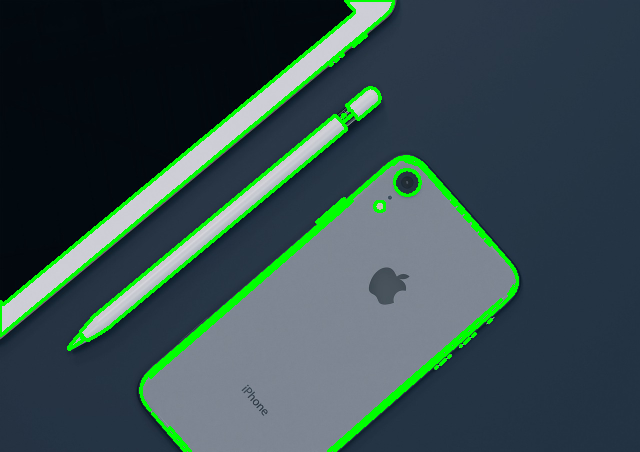

In [ ]:
# Hacer copia de la imagen, para tener la original intacta
image_copy = image.copy()

# la funcion drawContours requiere 4 inputs minimo (image= tu imagen, contours= los contornos,
# contourIdx= especificar que puntos queremos dibujar del contorno (si ponemos -1, se dibujan todos los contornos),
# color= el color para los contornos)

# aplicaremos otro argumento (opcional) que nos servira para hacer la linea mas visible

cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2)

cv2_imshow(image_copy)

# ¿Se debe usar solo escala de grises?

No necesariamente, aunque es lo más habitual. Otra técnica que se puede aplicar es la separación de canales RGB.

Lo veremos a continuacion:

In [ ]:
image = cv2.imread('image_1.jpg')
image = cv2.resize(image, (640, 452))

blue, green, red = cv2.split(image)

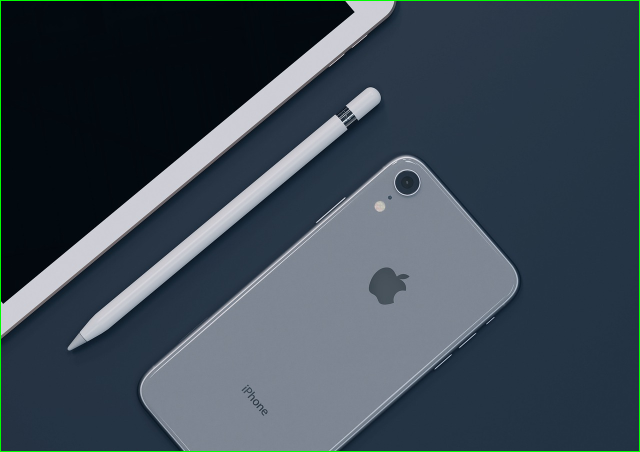

In [ ]:
# Blue

contoursB, hierarchyB = cv2.findContours(image=blue, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

image_contour_blue = image.copy()
cv2.drawContours(image=image_contour_blue, contours=contoursB, contourIdx=-1, color=(0, 255, 0))

cv2_imshow(image_contour_blue)

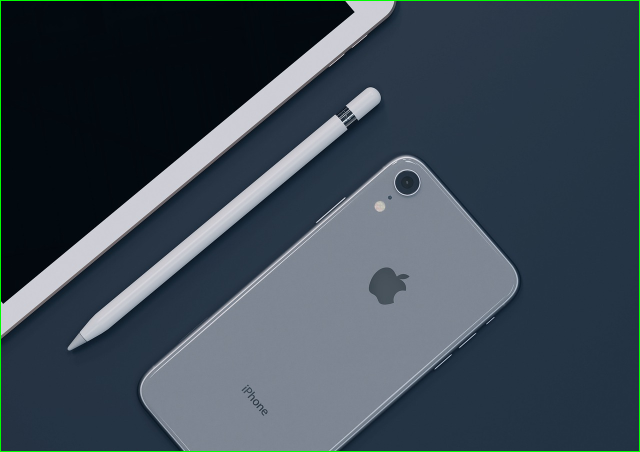

In [ ]:
# Green

contoursG, hierarchyG = cv2.findContours(image=green, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

image_contour_green = image.copy()
cv2.drawContours(image=image_contour_green, contours=contoursB, contourIdx=-1, color=(0, 255, 0))

cv2_imshow(image_contour_green)

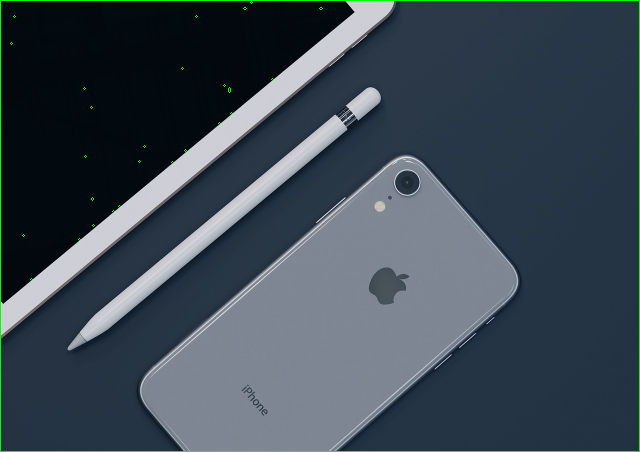

In [ ]:
# Red

contoursR, hierarchyR = cv2.findContours(image=red, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

image_contour_red = image.copy()
cv2.drawContours(image=image_contour_red, contours=contoursR, contourIdx=-1, color=(0, 255, 0))

cv2_imshow(image_contour_red)

5. Detectar contornos usando el método *CHAIN_APPROX_SIMPLE*

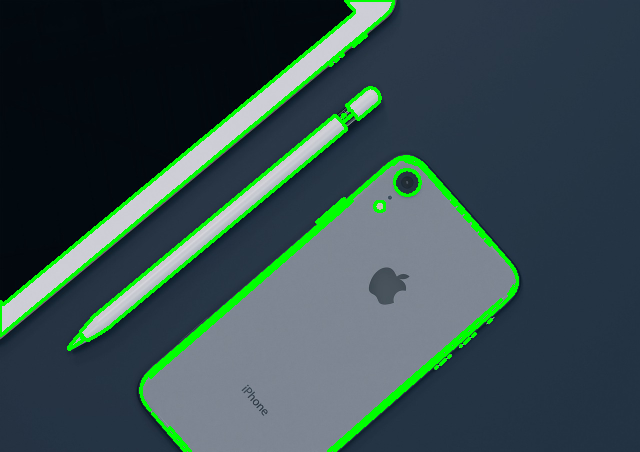

In [ ]:
contours1, hierarchy1 = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

image_copy1 = image.copy()
cv2.drawContours(image_copy1, contours1, -1, (0, 255, 0), 2)

cv2_imshow(image_copy1)

El algoritmo *CHAIN_APPROX_SIMPLE* **comprime** los segmentos horizontales, verticales y diagonales a lo largo del contorno y deja sólo sus **puntos finales**. Esto significa que cualquiera de los puntos a lo largo de las trayectorias rectas será descartado. Por ejemplo, consideremos un contorno, a lo largo de un rectángulo. Todos los puntos del contorno, excepto los cuatro puntos de las esquinas serán descartados. Este método es más rápido que *CHAIN_APPROX_NONE* porque el algoritmo no almacena todos los puntos, **utiliza menos memoria**, y por lo tanto, **tarda menos tiempo** en ejecutarse.

Aun así, con esta imagen no vemos casi diferencias entre ambos métodos, y el culpable de esto es la funcion **drawContours()**.

Aunque el método *CHAIN_APPROX_SIMPLE* suele dar como resultado menos puntos, la función **drawContours()** conecta automáticamente los puntos adyacentes, uniéndolos aunque no estén en la lista de contornos.

**¿Cómo podemos comprobar si funciona entonces?**

La forma más sencilla es hacer un loop manual sobre los puntos de contorno y dibujar un círculo sobre las coordenadas de contorno detectadas, utilizando la misma librería.

Además, cambiaremos la imagen para visualizar mejor los resultados.

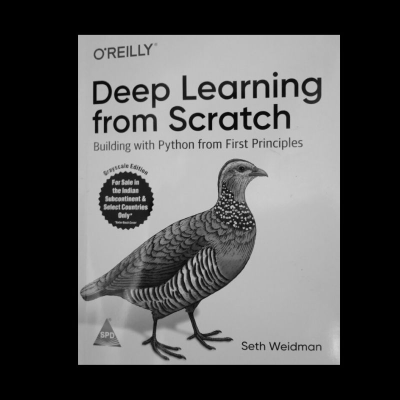

In [ ]:
image1 = cv2.imread('image_2.jpg')
image1 = cv2.resize(image1, (400, 400)) #achicamos para k se vea bien
img_gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

cv2_imshow(img_gray1)

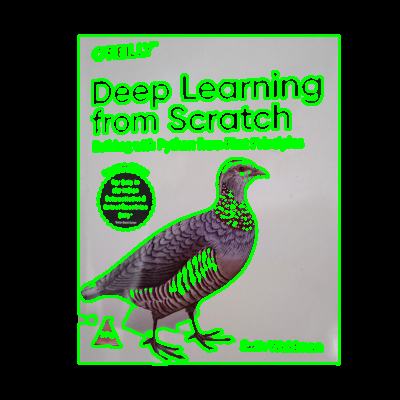

In [ ]:
# Aplicamos binary thresholding
ret, thresh1 = cv2.threshold(img_gray1, 150, 255, cv2.THRESH_BINARY)

# usamos la funcion findContours con CHAIN_APPROX_SIMPLE
contours2, hierarchy2 = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# hacemos una copia de la original
image_copy2 = image1.copy()

# dibujamos los contornos
cv2.drawContours(image_copy2, contours2, -1, (0, 255, 0), 2)

cv2_imshow(image_copy2)

Ya hicimos los pasos que aprendimos anteriormente, ahora aplicaremos
el loop manual para dibujar un circulo sobre las coordenadas del contorno

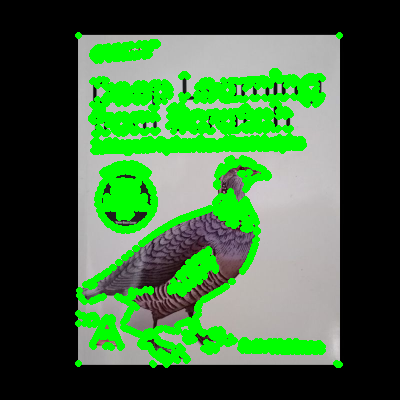

In [ ]:
image_copy3 = image1.copy()

for i, contour in enumerate(contours2): # loop over one contour area
   for j, contour_point in enumerate(contour): # loop over the points
       # draw a circle on the current contour coordinate
       cv2.circle(image_copy3, ((contour_point[0][0], contour_point[0][1])), 2, (0, 255, 0), 2)

cv2_imshow(image_copy3)

Ahora si podemos ver la diferencia ^^

# Jerarquías de Contorno


Las jerarquías denotan la relación padre-hijo entre los contornos. Verá cómo cada modo de recuperación de contornos afecta a la detección de contornos en imágenes y produce resultados jerárquicos.

**Parent-Child Relationship**

Los objetos detectados por los algoritmos de detección de contornos en una imagen pueden ser:


*   Objetos individuales dispersos en una imagen (como en el primer ejemplo)
*   Objetos y formas unos dentro de otros

En la mayoría de los casos, cuando una forma contiene más formas, podemos concluir con seguridad que la forma exterior es un padre de la forma interior.


Veamos ahora la figura siguiente, donde se han identificado los contornos asociados a cada forma de la figura 10. Cada uno de los números de la figura 11 tiene un significado.


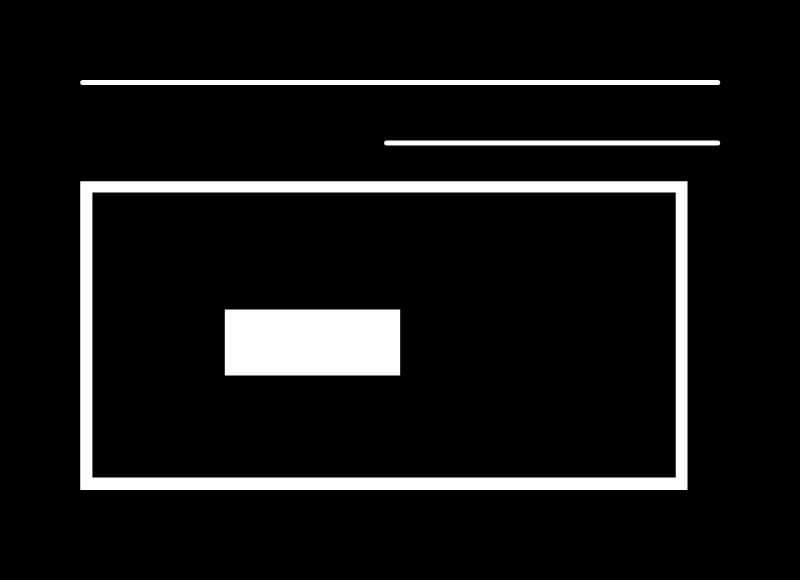



Todos los números individuales, es decir, 1, 2, 3 y 4 son objetos separados, de acuerdo con la jerarquía de contornos y la relación padre-hijo.
Podemos decir que el 3a es hijo del 3. Obsérvese que el 3a representa la parte interior del contorno 3.
Los contornos 1, 2 y 4 son todos ellos formas padre, sin ningún hijo asociado, y su numeración es por tanto arbitraria. En otras palabras, el contorno 2 podría haberse etiquetado como 1 y viceversa.

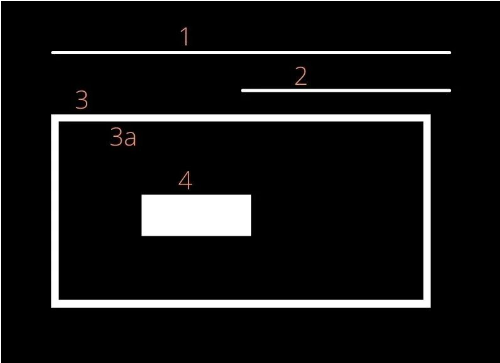

# Representación de la relación de contorno

Notaste como la función *findContours()* devuelve dos salidas? Estas son la lista de contornos, y la jerarquía. Ahora vamos a entender la salida de la jerarquía de contornos en detalle.

La jerarquía de contornos se representa como un array, que a su vez contiene arrays de cuatro valores. Se representa como:

> [Siguiente, Anterior, Primer_hijo, Padre]

**¿Qué significan todos estos valores?**

*   **Siguiente**

Denota el siguiente contorno en una imagen, que se encuentra en el mismo nivel jerárquico.

Por ejemplo, para el contorno 1, el siguiente contorno en el mismo nivel jerárquico es el 2. aquí, Next será 2.  En consecuencia, el contorno 3 no tiene ningún contorno en el mismo nivel jerárquico que él. Por lo tanto, su valor Next será -1.

*   **Anterior**

Denota el contorno anterior en el mismo nivel jerárquico. Esto significa que el contorno 1 siempre tendrá el valor -1.

*   **Primer_hijo**

Denota el primer contorno hijo del contorno que estamos considerando actualmente.

Los contornos 1 y 2 no tienen ningún hijo. Por tanto, los valores de índice de su Primer_hijo serán -1. Pero el contorno 3 tiene un hijo. Pero el contorno 3 tiene un hijo. Por lo tanto, para el contorno 3, el valor de la posición First_Child será la posición del índice 3a.

*   **Padre**

Denota la posición índice del contorno padre para el contorno actual.

Los contornos 1 y 2, como es obvio, no tienen contorno padre.
Para el contorno 3a, su padre será el contorno 3.
Para el contorno 4, el padre es el contorno 3a.



¿Cómo visualizamos realmente estas matrices jerárquicas? La mejor manera es:

1.   Utilizar una imagen simple con líneas y formas como la imagen anterior
2.   Detectar los contornos y las jerarquías, utilizando diferentes modos de recuperación
3. A continuación, imprimir los valores para visualizarlos


# Different Contour Retrieval Techniques


Hasta ahora, hemos utilizado un modo de extraccion de contornos, **RETR_TREE** para encontrar y dibujar contornos, pero hay tres técnicas más de recuperación de contornos en OpenCV, a saber: **RETR_LIST**, **RETR_EXTERNAL** y **RETR_CCOMP**.

Así que vamos a utilizar la imagen de la Figura 10 para revisar cada uno de estos cuatro métodos, junto con su código asociado para obtener los contornos.

El siguiente código lee la imagen del disco, la convierte a escala de grises y aplica umbralización binaria.

In [ ]:
# hacemos los pasos principales que ya conocemos
image2 = cv2.imread('custom_colors.jpg')
image2 = cv2.resize(image2, (400, 290)) #la achicamos
img_gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
ret, thresh2 = cv2.threshold(img_gray2, 150, 255, cv2.THRESH_BINARY)

# RETR_LIST

El método de extracción (o recuperación) de contornos **RETR_LIST** no crea ninguna relación padre-hijo entre los contornos extraídos. Así, para todas las áreas de contorno que se detectan, los valores de posición de los índices First_Child y Parent son siempre -1.

Todos los contornos tendrán sus correspondientes contornos Anterior y Siguiente como se ha comentado anteriormente.

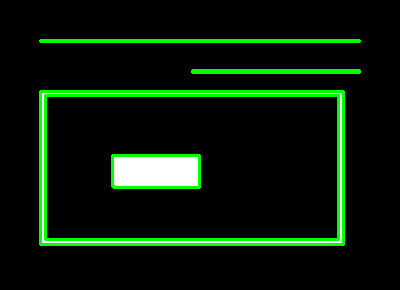

In [ ]:
contours3, hierarchy3 = cv2.findContours(thresh2, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
image_copy4 = image2.copy()
cv2.drawContours(image_copy4, contours3, -1, (0, 255, 0), 2)

cv2_imshow(image_copy4)

In [ ]:
print(hierarchy3)

[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [-1  3 -1 -1]]]


Se puede ver claramente que las posiciones de índice 3 y 4 de todas las áreas de contorno detectadas son -1, como era de esperar.

# RETR_EXTERNAL

El método **RETR_EXTERNAL** es realmente interesante. Sólo detecta los contornos padre, e ignora cualquier contorno hijo. Así, todos los contornos interiores como 3a y 4 no tendrán ningún punto dibujado en ellos.

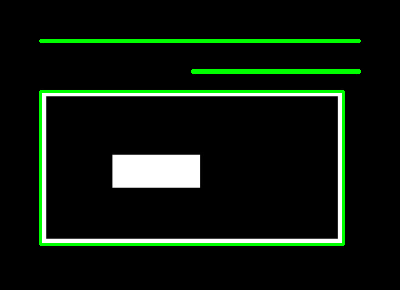

In [ ]:
contours4, hierarchy4 = cv2.findContours(thresh2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
image_copy5 = image2.copy()
cv2.drawContours(image_copy5, contours4, -1, (0, 255, 0), 2)

cv2_imshow(image_copy5)

In [ ]:
print(hierarchy4)

[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [-1  1 -1 -1]]]


La imagen de salida de arriba muestra sólo los puntos dibujados en los contornos 1, 2 y 3. Los contornos 3a y 4 se omiten porque son contornos hijos. Los contornos 3a y 4 se omiten porque son contornos hijos.

# RETR_CCOMP

A diferencia de RETR_EXTERNAL, RETR_CCOMP recupera todos los contornos de una imagen. Junto con eso, también aplica una jerarquía de 2 niveles a todas las formas u objetos de la imagen.

Esto significa:

*   Todos los contornos exteriores tendrán un nivel jerárquico 1
*   Todos los contornos interiores tendrán un nivel jerárquico 2

¿Pero qué pasa si tenemos un contorno dentro de otro contorno con nivel jerárquico 2? Igual que tenemos el contorno 4 después del contorno 3a.

En ese caso:



*   De nuevo, el contorno 4 tendrá nivel jerárquico 1.
*   Si hay algún contorno dentro del contorno 4, tendrá el nivel jerárquico 2.

En la imagen siguiente, los contornos se han numerado según su nivel jerárquico, como se ha explicado anteriormente.




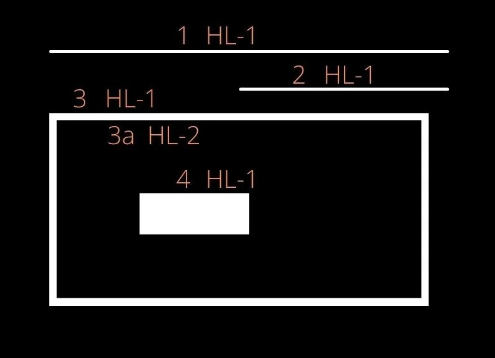

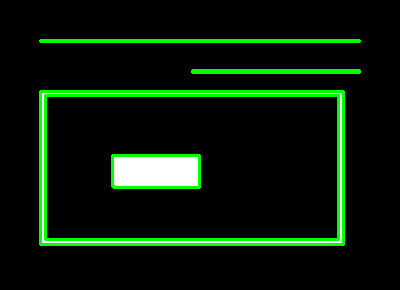

In [ ]:
contours5, hierarchy5 = cv2.findContours(thresh2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
image_copy6 = image2.copy()
cv2.drawContours(image_copy6, contours5, -1, (0, 255, 0), 2)

cv2_imshow(image_copy6)

In [ ]:
print(hierarchy5)

[[[ 1 -1 -1 -1]
  [ 3  0  2 -1]
  [-1 -1 -1  1]
  [ 4  1 -1 -1]
  [-1  3 -1 -1]]]


Aquí vemos que se mantienen todas las relaciones Siguiente, Anterior, Primer_hijo y Padre, según el método de recuperación de contornos, ya que se detectan todos los contornos. Como era de esperar, el Previous de la primera área de contorno es -1. Y los contornos que no tienen ningún padre también tienen el valor -1.

# RETR_TREE

Al igual que RETR_CCOMP, RETR_TREE también recupera todos los contornos. También crea una jerarquía completa, con los niveles no restringidos a 1 ó 2. Cada contorno puede tener su propia jerarquía, de acuerdo con el nivel en el que se encuentre y la correspondiente relación padre-hijo que tenga.


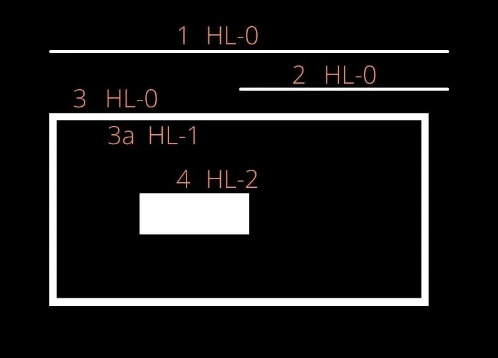

De la figura anterior se deduce que:



*   Los contornos 1, 2 y 3 están en el mismo nivel, es decir, en el nivel 0.
*   El contorno 3a está presente en el nivel jerárquico 1, ya que es hijo del contorno 3.
*   El contorno 4 es una nueva zona de contorno, por lo que su nivel jerárquico es el 2.

El siguiente código utiliza el modo RETR_TREE para recuperar los contornos.

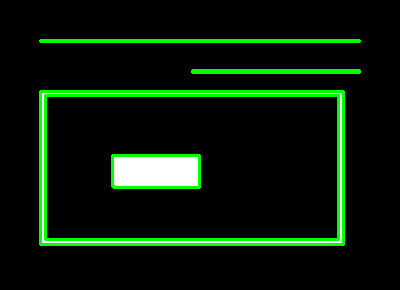

In [ ]:
contours6, hierarchy6 = cv2.findContours(thresh2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
image_copy7 = image2.copy()
cv2.drawContours(image_copy7, contours6, -1, (0, 255, 0), 2)

cv2_imshow(image_copy7)

In [ ]:
print(hierarchy6)

[[[ 3 -1  1 -1]
  [-1 -1  2  0]
  [-1 -1 -1  1]
  [ 4  0 -1 -1]
  [-1  3 -1 -1]]]


Todos los contornos se dibujan como se espera y las áreas de contorno son claramente visibles. También se deduce que los contornos 3 y 3a son dos contornos distintos, ya que tienen límites y áreas de contorno diferentes. Al mismo tiempo, es muy evidente que el contorno 3a es hijo del contorno 3.

# Comparación del tiempo de ejecución de distintos métodos de recuperación de contornos



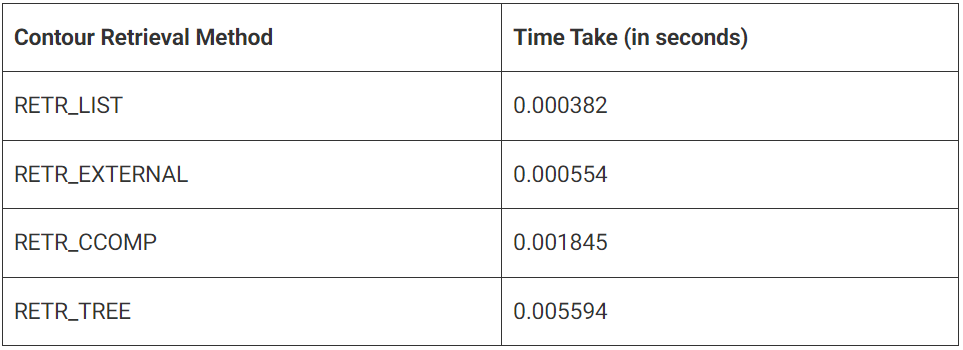

# Observaciones



*   RETR_LIST y RETR_EXTERNAL son los que menos tiempo tardan en ejecutarse, ya que RETR_LIST no define ninguna jerarquía y RETR_EXTERNAL sólo recupera los contornos padre.
*   RETR_CCOMP tarda el segundo mayor tiempo en ejecutarse. Recupera todos los contornos y define una jerarquía de dos niveles.
*   RETR_TREE tarda el máximo tiempo en ejecutarse, ya que recupera todos los contornos y define también el nivel jerárquico independiente para cada relación padre-hijo.







Aunque los tiempos mencionados pueden no parecer significativos, es importante ser consciente de las diferencias para las aplicaciones que pueden requerir una cantidad significativa de procesamiento de contornos. También conviene señalar que este tiempo de procesamiento puede variar, dependiendo en cierta medida de los contornos que extraigan y de los niveles jerárquicos que definan.

# Limitaciones


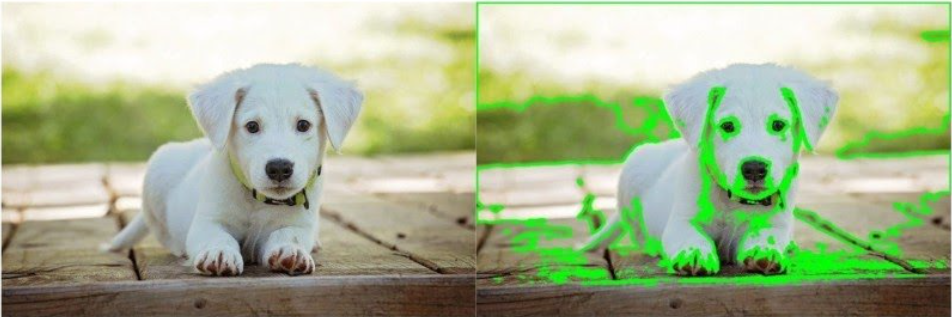

TAREA: ¿Qué pueden detectar en esta imagen? Que falló?